In [92]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
# Imputations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Text file1 to dataframes

data=pd.read_csv("D:/DataSets/kaggle_visible_evaluation_triplets.txt", sep="\t", names=['user_id', 'song_id', 'freq'])
data

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [95]:
# Text file2 to dataframes

data1=pd.read_csv("D:/DataSets/unique_tracks.txt", sep="<SEP>", names=['track_id', 'song_id', 'artist_name', 'release'])
data1

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


In [96]:
# Checking for NULL values

print(sum(data.isnull().any()), sum(data1.isnull().any()))

0 1


In [97]:
# Checking for duplicated values for first dataframe


duplicated=data.duplicated()
sum(duplicated)

0

In [98]:
# Checking for duplicated values for second dataframe

duplicated=data1.duplicated()
sum(duplicated)

0

In [99]:
# Checking for duplicated values for song_id

duplicated=data1["song_id"].duplicated()
sum(duplicated)

944

In [100]:
# merging Two dataframes

data2=pd.merge(data,data1)
data2

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
...,...,...,...,...,...,...
1491947,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,TRZHWHD128F42B9D11,Our Broken Garden,The Blinding
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,TRNBQWA128F145DB74,Emilio,Como A Nadie
1491949,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,TRIWGAI12903CDF710,Morbid Angel,Victorious March Of Reign The Conqueror
1491950,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,TRMPODL128F4228DE1,Gus Gus,Call of the Wild


# Identification of variables and data types

In [101]:
# Viewing Columns 

data2.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [102]:
# Viewing shape 

data2.shape

(1491952, 6)

In [103]:
# Viewing datatype of each column 

data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491952 entries, 0 to 1491951
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1491952 non-null  object
 1   song_id      1491952 non-null  object
 2   freq         1491952 non-null  int64 
 3   track_id     1491952 non-null  object
 4   artist_name  1491952 non-null  object
 5   release      1491951 non-null  object
dtypes: int64(1), object(5)
memory usage: 79.7+ MB


# Analyzing the basic metrics

In [104]:
print("Total number of records=", data2.shape[0])

Total number of records= 1491952


In [105]:
print("Total number of users=", data2["user_id"].unique().shape[0])

Total number of users= 110000


In [106]:
print("Total number of songs=", data2["song_id"].unique().shape[0])

Total number of songs= 163206


In [107]:
print("Unique Artists=", data2["artist_name"].unique().shape[0])

Unique Artists= 28367


In [108]:
print("Unique releases=", data2["release"].unique().shape[0])

Unique releases= 137675


# Non-Graphical Univariate Analysis

In [109]:
# Top 5 most listened songs



song_grouped = data2.groupby(['song_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'song_id'], ascending = [0,1]).head()

,song_id,freq,percentage
38185,SOFRQTD12A81C233C0,5043,0.338014
5478,SOAUWYT12A81C206F1,4483,0.300479
10546,SOBONKR12A58A7A7E0,4136,0.277221
140446,SOWCKVR12A8C142411,3822,0.256174
6096,SOAXGDH12A8C13F8A1,3780,0.253359


In [110]:
# 5 least listened songs



song_grouped = data2.groupby(['song_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'song_id'], ascending = [0,1]).tail()

,song_id,freq,percentage
163191,SOZZYCA12AB0182579,1,0.000067
163199,SOZZZFM12AC4687A9E,1,0.000067
163200,SOZZZFW12AB0187AD1,1,0.000067
163202,SOZZZKJ12A6D4FBF66,1,0.000067
163204,SOZZZRV12A8C1361F1,1,0.000067


In [111]:
# Top 5 Users who listened to most songs



song_grouped = data2.groupby(['user_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'user_id'], ascending = [0,1]).head()

,user_id,freq,percentage
21323,316110734d8da7478cc33237458814f770a9eb7a,57,0.003820
74342,ad4b2717e89766b66b96fe52a38736116e315874,57,0.003820
21676,3233c598c50f0ddbd351504e773cd51de79691db,55,0.003686
90678,d30e18323f15426c3cdc8585252ed34459916f51,55,0.003686
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,54,0.003619


In [112]:
# 5 Users who listened to least songs



song_grouped = data2.groupby(['user_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'user_id'], ascending = [0,1]).tail()

,user_id,freq,percentage
109942,ffe3151c73f3b4d472f8dcef97051b97a37dd098,5,0.000335
109950,ffe6adab8edbd3f53230e34379b063419396e319,5,0.000335
109974,ffefe5cc52de004e20121395da5113ab2e502555,5,0.000335
109981,fff2649ed1dcb2f6d8b45081fa1ab16d9e79c1ed,5,0.000335
109988,fff7d30a45a17d26768d020b75818008a741ef2c,5,0.000335


In [113]:
# Top 5 Artists users listen to the most

artist=pd.DataFrame(data2["artist_name"].value_counts())
artist.columns=["Count"]
artist.head()

,Count
Coldplay,13675
Kings Of Leon,11586
Justin Bieber,9259
Florence + The Machine,8213
Eminem,8160


In [114]:
# 5 Artists users listen the least

artist=pd.DataFrame(data2["artist_name"].value_counts())
artist.columns=["Count"]
artist.tail()

,Count
Chingo Bling w/ICE,1
LD,1
Negative Approach,1
Macy Gray featuring Erykah Badu,1
Tommy Smith,1


In [115]:
# Top 5 relases users listen to the most

artist=pd.DataFrame(data2["release"].value_counts())
artist.columns=["Count"]
artist.head()

,Count
Sehr kosmisch,5043
Undo,4483
You're The One,4270
Use Somebody,3822
Dog Days Are Over (Radio Edit),3780


In [116]:
# 5 relases users listen the least

artist=pd.DataFrame(data2["release"].value_counts())
artist.columns=["Count"]
artist.tail()

,Count
The Fight to Be Human,1
O Meu Lugar ( No Way),1
Start Over,1
Aeroplanes and Hurricanes,1
Tourner Ma Page,1


In [117]:
artist_name = data2.groupby('artist_name')['freq'].count()
artist_name.head()

artist_name
!!!                     109
!Deladap                  3
& And Oceans              2
'68 Comeback             22
'N Sync/Phil Collins     48
Name: freq, dtype: int64

In [118]:
artist_name = pd.DataFrame(artist_name)

In [119]:
artist_name.head(20)

,freq
artist_name,
!!!,109
!Deladap,3
& And Oceans,2
'68 Comeback,22
'N Sync/Phil Collins,48
'Til Tuesday,27
't Hof Van Commerce,16
't Hof Van Commerce & Brahim,2
(Hed) Planet Earth,3


In [120]:
artist_name.sort_values(by='freq').tail(20)

,freq
artist_name,
Harmonia,5046
Guns N' Roses,5061
BjÃ¶rk,5144
Evanescence,5170
Daft Punk,5411
John Mayer,5452
The Killers,5721
Radiohead,5764
Linkin Park,5846


In [121]:
artist_and_songs = data2.groupby('artist_name')['release']
artist_and_songs.head(10)

0             You're The One
1             You're The One
2             You're The One
3             You're The One
4             You're The One
                 ...        
1491931       Lungo la Senna
1491932      Popcorn Slavery
1491934              Zukunft
1491935    And The Beat Goes
1491937          Straight Up
Name: release, Length: 171964, dtype: object

In [122]:
artist_and_songs.describe()

,count,unique,top,freq
artist_name,,,,
!!!,109,10,Sweet Life,46
!Deladap,3,2,Goldregen (N.O.H.A. Mix),2
& And Oceans,2,2,Odious And Devious,1
'68 Comeback,22,20,He's My Everything,2
'N Sync/Phil Collins,48,1,Trashin' The Camp (Phil And 'N Sync Version),48
...,...,...,...,...
Ã‰rika Machado,2,2,Dependente,1
Ã‰tienne Daho,45,16,Le Premier Jour (Du Reste De Ta Vie) (Remix 05),12
Ã�gata,1,1,Conselho de mÃ£e,1


In [123]:
artist_and_songs = pd.DataFrame(artist_and_songs)

In [124]:
artist_and_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28367 entries, 0 to 28366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       28367 non-null  object
 1   1       28367 non-null  object
dtypes: object(2)
memory usage: 443.4+ KB


# Graphical Univariate Analysis

In [125]:
from scipy import stats

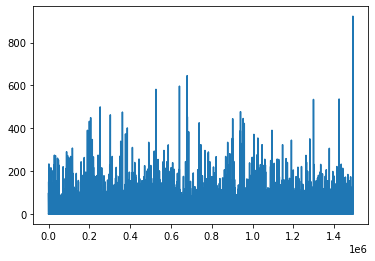

In [126]:
plt.plot(data2.freq)

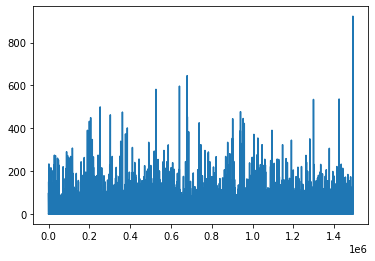

In [127]:
x = np.arange(0,data2['freq'].shape[0])
p = data2.freq
plt.plot(x, p)
plt.show()

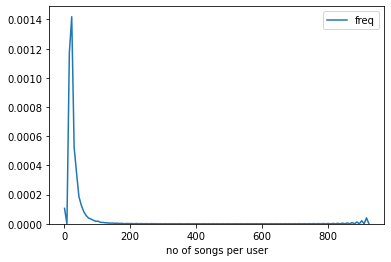

In [128]:
plt.xlabel('no of songs per user')
sns.kdeplot(data2.freq)
plt.show()

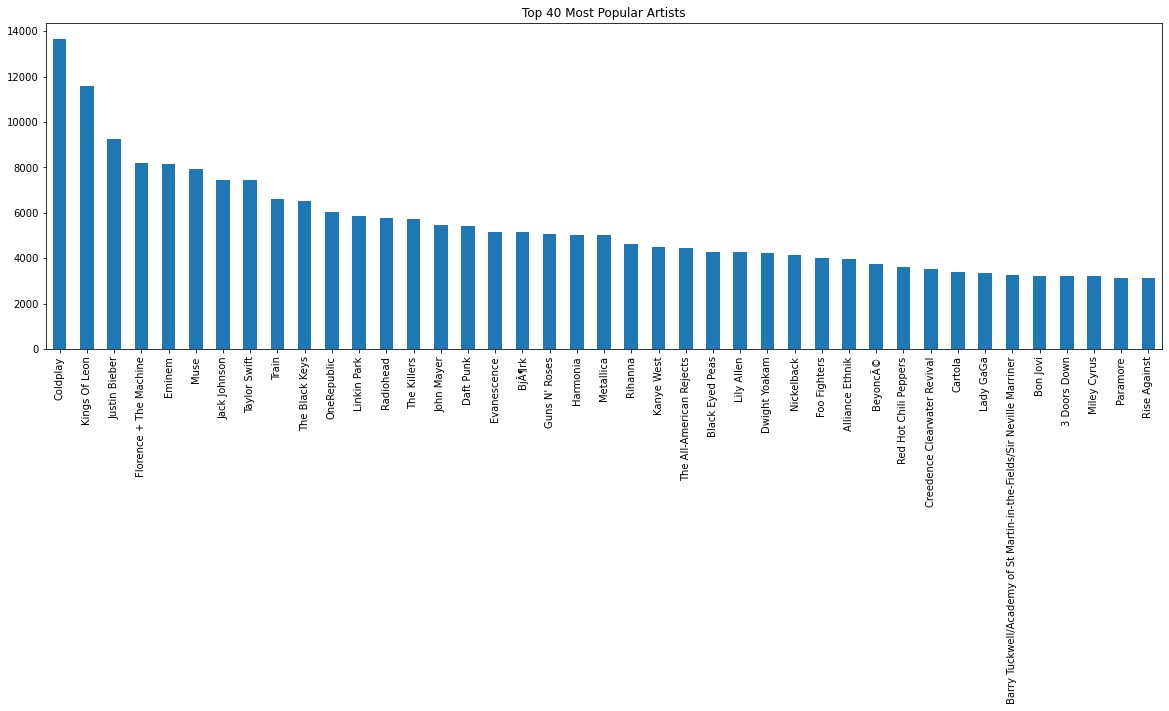

In [129]:
# Creates a plot of most popular artists.
def PlotmostPopularArtists():
    plt.close("all")
    plt.figure(figsize=(20,6))
    data2['artist_name'].value_counts()[0:41].plot(kind='bar', title="Top 40 Most Popular Artists")
    plt.show()
PlotmostPopularArtists()

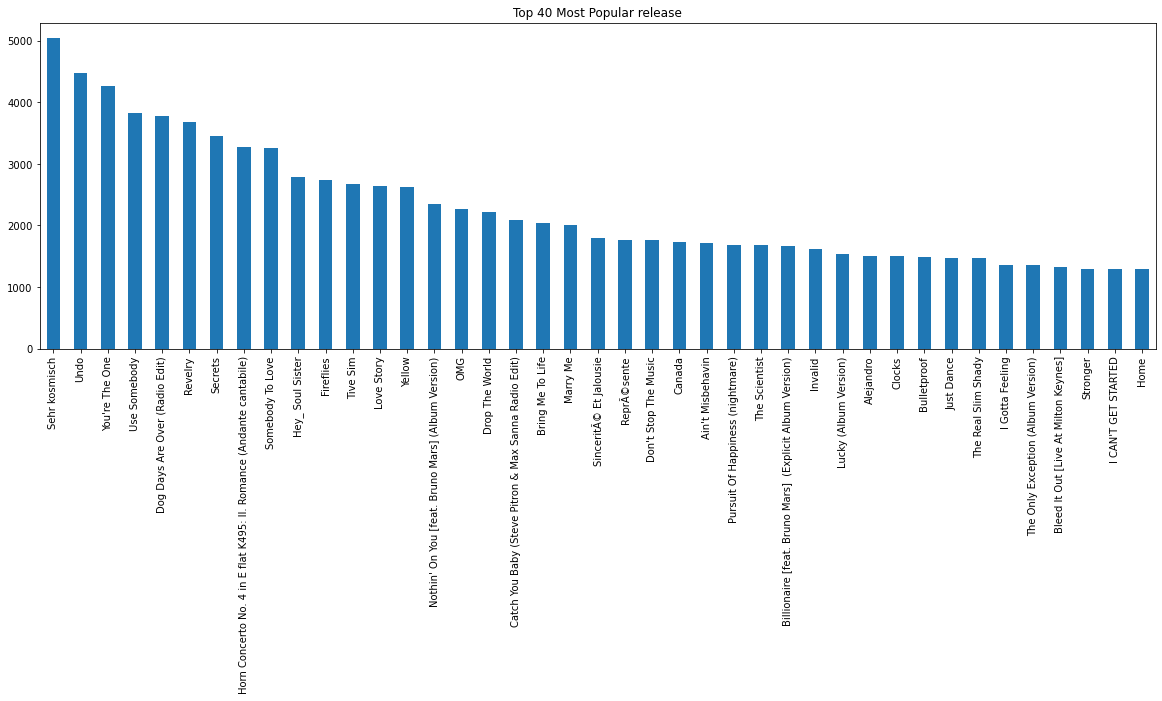

In [130]:
# Creates a plot of most popular releases.
def PlotmostPopularRelease():
    plt.close("all")
    plt.figure(figsize=(20,6))
    data2['release'].value_counts()[0:41].plot(kind='bar', title="Top 40 Most Popular release")
    plt.show()
PlotmostPopularRelease()

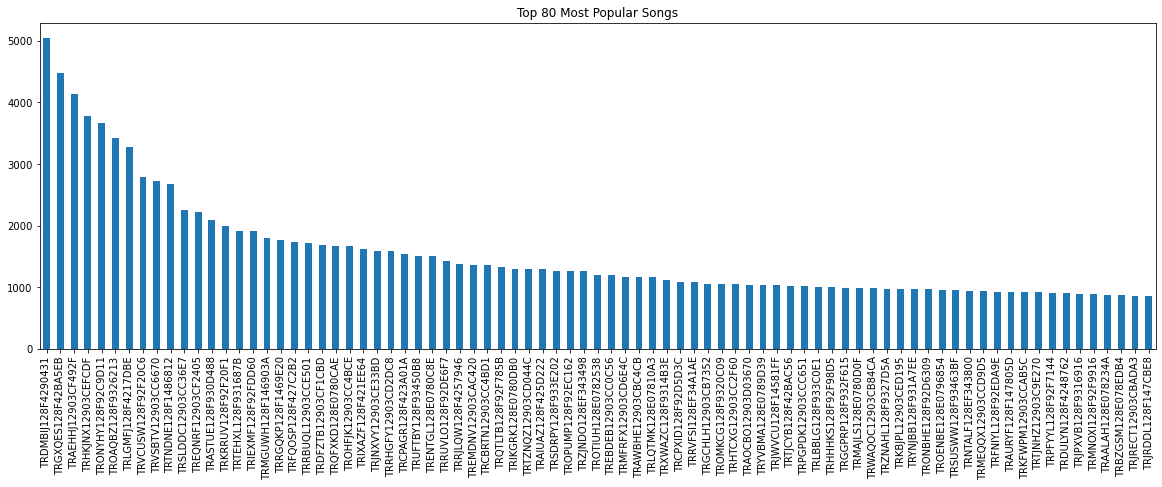

In [131]:
# Creates a plot of most popular track.
def PlotmostPopularTracks():
    plt.close("all")
    plt.figure(figsize=(20,6))
    data2['track_id'].value_counts()[0:81].plot(kind='bar', title="Top 80 Most Popular Songs")
    plt.show()
PlotmostPopularTracks()    

# Outlier detection and Treatment

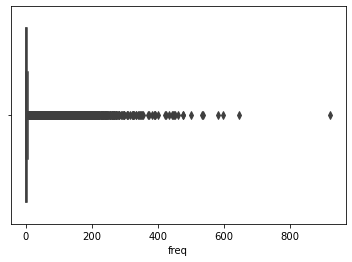

In [132]:
sns.boxplot(data2["freq"])

# there are outliers in freq column

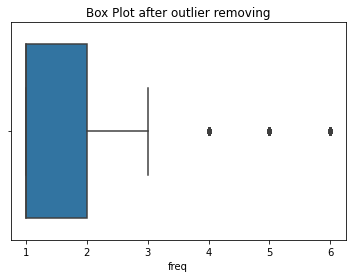

In [133]:
# Handling Outliers
def drop_outliers(data2, field_name):
    iqr = 1.5 * (np.percentile(data2[field_name], 75) - np.percentile(data2[field_name], 25))
    data2.drop(data2[data2[field_name] > (iqr + np.percentile(data2[field_name], 75))].index, inplace=True)
    data2.drop(data2[data2[field_name] < (np.percentile(data2[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(data2, 'freq')
sns.boxplot(data2['freq'])
plt.title("Box Plot after outlier removing")
plt.show()

# Recommendation functions for Popularity based and Content Based recommendation

In [134]:
import numpy as np
import pandas

#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pandas.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [135]:
song_df = data2.head(20000)

# popularity based recommendation

In [136]:
pr =popularity_recommender_py()


In [137]:
pr.create(song_df, 'user_id', 'release')

In [138]:
pr.recommend(song_df['user_id'])

,user_id,release,score,Rank
37,373ecbeb61e43aebef7ef8bdb86d58c041d478bf,Sehr kosmisch,4265,1.0
10,NaN,Dog Days Are Over (Radio Edit),3264,2.0
51,ae147632af6757213b3a0110d8a0ecf2d36691ee,You're The One,2984,3.0
19,c48985d93d590dff33d20094eebc863b0cb455e8,Horn Concerto No. 4 in E flat K495: II. Romanc...,2643,4.0
46,4b26fdf7b58e33f22e34a6a271c5a4aa037331fe,Tive Sim,2406,5.0
5,f6e34f0a68d5ea1344511e33486f956de361db78,Catch You Baby (Steve Pitron & Max Sanna Radio...,1698,6.0
47,da7830e1d8cbf91324d11b365b8c5b5f1a3c1a8a,Unite (2009 Digital Remaster),674,7.0
33,847f841d124e60a5cda2c046e455e9c15e7ac8cd,Oxford Comma (Album),312,8.0
44,134aaf50309691041e71d2db6109799b6837c8ff,The Downfall Of Us All,177,9.0
12,eead1f1e3ad91575346f9ce826ddaea19bff80ed,El Cuatrero,152,10.0


# Content Based filtering 

In [139]:
ir = item_similarity_recommender_py()
ir.create(song_df, 'user_id', 'release')

In [140]:
user_items = ir.get_user_items(song_df['user_id'])

In [141]:
# display user songs history
for user_item in user_items:
    print(user_item)

You're The One
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)
Tive Sim
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)
El Cuatrero
Unite (2009 Digital Remaster)
Lift Me Up
Living In A Lie
Open Your Eyes
Kurtizana
Happy Hour Hero
Dreamcatcher
Sleep Sound In Jesus
Space Cowboy
Mine All Mine
Rain
She's My Heroine
Ain't Got Time
Bullet With Butterfly Wings (smashing Pumpkins Cover)
Crossing The Deadline
Little L
Big In Japan
Sehr kosmisch
Heretics (early version)
Respect (Amended Version)
Love Is A Deserter
Dog Days Are Over (Radio Edit)
Devil In The Details (Album Version)
Climax
Finding Myself
Oxford Comma (Album)
The Count Of Monte Christo
Hardcore Days & Softcore Nights (Album Version)
Old School
Universal Traveler
Rock Rock Y'all
I Got 5 On It
Beat Goes On [Featuring Kanye West] (Album Version)
What They Do
Dear Maria_ Count Me In
I Heard It's The Softest Thing Ever (Album Version)
A Party Song (The Walk of Shame)
You Already Know What You Are
Your Song
The D

In [142]:
# give song recommendation for that user
ir.recommend(song_df['user_id'])

No. of unique songs for the user: 54
no. of unique songs in the training set: 54
Non zero values in cooccurence_matrix :916
The current user has no songs for training the item similarity based recommendation model.


-1

In [143]:

# give related songs based on the words
ir.get_similar_items(["You're The One"])

no. of unique songs in the training set: 54
Non zero values in cooccurence_matrix :25


,user_id,song,score,rank
0,,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.085455,1
1,,Tive Sim,0.064376,2
2,,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.053555,3
3,,Sehr kosmisch,0.040925,4
4,,Dog Days Are Over (Radio Edit),0.035981,5
5,,Unite (2009 Digital Remaster),0.022645,6
6,,Oxford Comma (Album),0.003043,7
7,,Kryptonite,0.001281,8
8,,El Cuatrero,0.001277,9
9,,The Downfall Of Us All,0.001267,10


# Collaborative filtering 

In [144]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

class Recommender:
    def __init__(self, metric, algorithm, k, data, decode_id_song):
        self.metric = metric
        self.algorithm = algorithm
        self.k = k
        self.data = data
        self.decode_id_song = decode_id_song
        self.data = data
        self.model = self._recommender().fit(data)
    
    def make_recommendation(self, new_song, n_recommendations):
        recommended = self._recommend(new_song=new_song, n_recommendations=n_recommendations)
        print("... Done")
        return recommended 
    
    def _recommender(self):
        return NearestNeighbors(metric=self.metric, algorithm=self.algorithm, n_neighbors=self.k, n_jobs=-1)
    
    def _recommend(self, new_song, n_recommendations):
        # Get the id of the recommended songs
        recommendations = []
        recommendation_ids = self._get_recommendations(new_song=new_song, n_recommendations=n_recommendations)
        # return the name of the song using a mapping dictionary
        recommendations_map = self._map_indeces_to_song_title(recommendation_ids)
        # Translate this recommendations into the ranking of song titles recommended
        for i, (idx, dist) in enumerate(recommendation_ids):
            recommendations.append(recommendations_map[idx])
        return recommendations
                 
    def _get_recommendations(self, new_song, n_recommendations):
        # Get the id of the song according to the text
        recom_song_id = self._fuzzy_matching(song=new_song)
        # Start the recommendation process
        print(f"Starting the recommendation process for {new_song} ...")
        # Return the n neighbors for the song id
        distances, indices = self.model.kneighbors(self.data[recom_song_id], n_neighbors=n_recommendations+1)
        return sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    def _map_indeces_to_song_title(self, recommendation_ids):
        # get reverse mapper
        return {song_id: song_title for song_title, song_id in self.decode_id_song.items()}
    
    def _fuzzy_matching(self, song):
        match_tuple = []
        # get match
        for title, idx in self.decode_id_song.items():
            ratio = fuzz.ratio(title.lower(), song.lower())
            if ratio >= 60:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        if not match_tuple:
            print(f"The recommendation system could not find a match for {song}")
            return
        return match_tuple[0][1]

In [145]:
song_user = song_df.groupby('user_id')['song_id'].count()

In [146]:
song_ten_id = song_user[song_user > 10].index.to_list()

In [147]:
df_song_id_more_ten = song_df[song_df['user_id'].isin(song_ten_id)].reset_index(drop=True)

In [148]:
from scipy.sparse import csr_matrix
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='freq').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [149]:
df_songs_features.head()

user_id,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,d7083f5e1d50c264277d624340edaaf3dc16095b
song_id,,
SOACRJG12A8C137A8D,0.0,1.0
SOATCSU12A8C13393A,0.0,1.0
SOAYGQW12AB017D6FA,1.0,0.0
SODSKZZ12AB0188524,0.0,1.0
SOEFCDJ12AB0185FA0,0.0,2.0


In [150]:
df_unique_songs = song_df.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'release']]

In [151]:
decode_id_song = {
    song: i for i, song in enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].release))
}

In [152]:
model = Recommender(metric='cosine', algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)

In [153]:
song="You're The One"

In [154]:
from fuzzywuzzy import fuzz
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)

Starting the recommendation process for You're The One ...
... Done


In [155]:
print(f"The recommendations for {song} are:")
print(f"{new_recommendations}")

The recommendations for You're The One are:
["I Heard It's The Softest Thing Ever (Album Version)", 'Have Faith In Me', 'Dear Maria_ Count Me In', 'The Silence (Album Version)', 'If You Wanted A Song Written About You_ All You Had To Do Was Ask (Album)', 'The Downfall Of Us All', 'Stay Awake (Dreams Only Last For A Night)', 'Homesick [Acoustic]', 'A Party Song (The Walk of Shame)', 'Sound The Alarm']


# Hybrid Recommender System with Scikit-Surprise

In [156]:
import surprise

In [157]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(song_df[['user_id', 'song_id', 'freq']], reader)

In [158]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [159]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [160]:
predictions = algo.test(testset)

In [161]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.4800


1.4800085369410982